In [1]:
#Unknown: Decompose the solution into a Fourier Series and determine the number of harmonics 

#data: p = 12, rug kutta then FT then calculate the data 

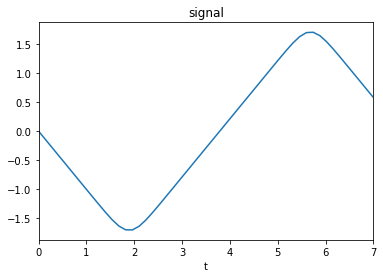

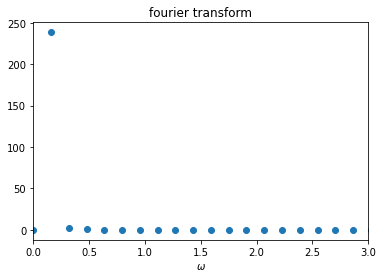

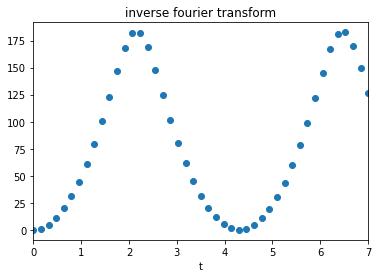

In [9]:
from numpy import *
import matplotlib.pyplot as plt
import cmath  
import numpy as np


a = 0.
b = 7
n = 50                    
twopi  = 2.*pi;       
sq2pi = 1./sqrt(twopi);        
step = 2.*pi/n

ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n
xp=np.array([0.0])
yp=np.array([y[0]])

dftz  = zeros( n, complex )                  # Complex elements
nplot = zeros( n, float )   
fplot = zeros( n, float ) 
inv_ft  = zeros( n, complex )                  # Complex elements
inv_n = zeros( n, float )   
inv_f = zeros( n, float ) 


def f( t, y):                # Force function 
    fReturn[0] = y[1]                                          
    fReturn[1] = -0.01*y[0]**11      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

def F(dftz):                                              # DFT
    for ii in range(0, n):              
        zsum = complex(0.0, 0.0)                
        for jj in range(0, n):                              
            zexpo = complex(0, twopi*jj*ii/n)           # Complex exponent
            zsum += yp[jj]*exp(-zexpo)           
        dftz[ii] = zsum * sq2pi      
        nplot[ii] = ii/n/step
        fplot[ii] = dftz[ii].imag*dftz[ii].imag+dftz[ii].real*dftz[ii].real

def inv_F(inv_ft):
    for ii in range(0,n):
        zsum = complex(0.0, 0.0)                
        for jj in range(0, n):                              
            zexpo = complex(0, twopi*jj*ii/n)           # Complex exponent
            zsum += dftz[jj]*exp(zexpo)    
        inv_ft[ii] = zsum*sq2pi
        inv_n[ii] = ii/n/step
        inv_f[ii] = inv_ft[ii].imag*inv_ft[ii].imag+inv_ft[ii].real*inv_ft[ii].real
        

while (t < b):         # solving rk4                                      # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
     
# taking the fourier transform
F(dftz)
# taking the inverse fourier transform
inv_F(inv_ft)

plt.plot(xp,yp)
plt.xlabel("t")
plt.title("signal")
plt.xlim([a,b])
plt.show()
plt.scatter(nplot,fplot)
plt.xlabel(r"$\omega$")
plt.title("fourier transform")
plt.xlim([0.,3.])
plt.show()
plt.scatter(inv_n,inv_f)
plt.xlabel("t")
plt.title("inverse fourier transform")
plt.xlim([a,b])
plt.show()